In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_csv(r'train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [28]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Dapat dilihat bahwa tidak ada missing value dalam dataset

In [7]:
df.duplicated(subset=['id']).sum()

0

Dapat dilihat bahwa pada kolom 'id' tidak ada data duplikat yang ditemukan, sehingga dapat disimpulkan bahwa tidak ada data duplikat dalam dataset ini.

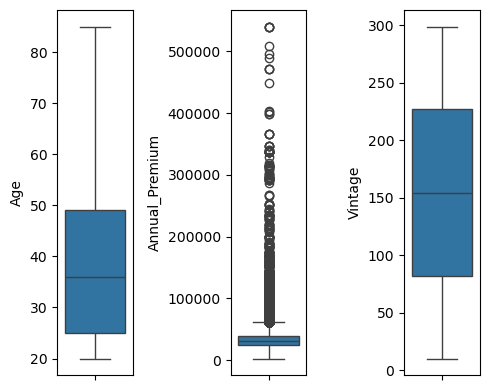

In [8]:
nums = ["Age","Annual_Premium","Vintage"]

plt.figure(figsize=(5, 4))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Setelah dilakukan pengecekan outlier dengan menggunakan boxplot didapat bahwa kolom 'Age' dan 'Vintage' tidak memiliki outlier, sedangakan pada kolom 'Annual_Premium' terdapat outliers. 

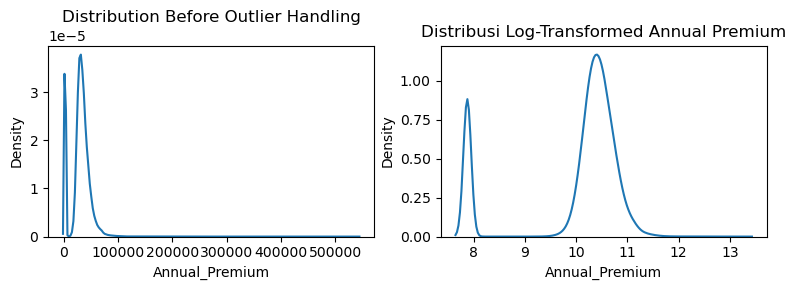

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.kdeplot(df['Annual_Premium'], ax=axes[0]) # KDE plot before handling ouliers
axes[0].set_title('Distribution Before Outlier Handling')

dfa=df
sns.kdeplot(np.log(dfa['Annual_Premium']), ax=axes[1]) # KDE plot after handling outlliers with Log Transformed
axes[1].set_title('Distribusi Log-Transformed Annual Premium')

plt.tight_layout()
plt.show()

Untuk mengatasi outlier pada kolom 'Annual_Premium' dilakukan handling outliers dengan menggunakan metode Log Transform karena distribusi data skewness positif atau condong ke kanan. 